<img align="center" src="data/handout/course.png" width="800">

## Hough Transform - Assignment 1
    Instructor: Kris                          TAs: Rawal (Lead), Yan, Zen, Wen-Hsuan, Paritosh, Qichen

In this assignment you will be implementing a Hough Transform based line detector. 

<img align="center" src="data/handout/ht.gif" width="500">

---
## Theory Questions (25 points)
**Grading**: 
- Each question is 5 points. 
- Please add your answers to the writeup. Insert images whenever necessary.
- Show all your work to obtain full credit.

**Q1**: Show that using $ x\cos \theta + y \sin \theta - \rho = 0 $, each image point $(x, y)$ results in a sinsuoid in $(\rho, \theta)$ hough space.  
Use the formulation, $a \sin \theta + b \cos \theta = A \sin(\theta + \phi)$ for the sinsuoid.  
Write the amplitude \\(A \\) and phase \\( \phi \\) of the sinusoid as a function of \\( (x, y) \\). 

We can show that $ x\cos \theta + y \sin \theta - \rho = 0 $ leads to a sinusoid in $(\rho, \theta)$ space. First off, let's put our y-axis value on one side:

$ \rho = x\cos \theta + y \sin \theta $

Note that $x$ and $y$ are fixed values here, they are not variables. Using the identity $a \sin \theta + b \cos \theta = A \sin(\theta + \phi)$, we can rewrite this as

$ \rho = x\cos \theta + y \sin \theta $
$ \rho = A \sin(\theta + \phi) $

Where $A$ and $\phi$ are some function of $x$ and $y$, and are thus fixed values. So we know that each image point results in some $(\theta, \rho)$ sinusoid.

==============================================

Now let's solve for the relationship between $A, \phi$ and $x, y$.

$x\cos \theta + y \sin \theta = A \sin(\theta + \phi)$

There is a trig identity stating $\sin(\theta + \phi) = \sin(\theta)\cos(\phi)+ \cos(\theta)\sin(\phi)$, so we can re-write this as

$x\cos \theta + y \sin \theta = A \sin(\theta)\cos(\phi)+ A\cos(\theta)\sin(\phi)$

So therefore

$x = A\sin(\phi)$

$y = A\cos(\phi)$

We know that

$x^2 + y^2 = A^2 \sin^2 \phi + A^2 \cos^2 \phi$

$x^2 + y^2 = A^2 (\sin^2 \phi + \cos^2 \phi)$

$x^2 + y^2 = A^2$

So therefore $A = f(x, y)$, where

$ f(x, y) = \sqrt{ x^2 + y^2 } $

And $\phi = g(x, y)$, where

$ g(x, y) = \arcsin( x / f(x, y) ) $

<!-- Note to self - I tested this equation for A and phi in the Q4 plot, looked good -->

**Q2**: Why do we parameterize the line in terms of \\(\rho, \theta\\) instead of slope and intercept \\((m, c)\\)?  
Also write the slope \\(m\\) and intercept \\(c\\) as a function of \\(\rho\\) and \\(\theta\\). 

In short, we parameterize the line in terms of the normal-form line equation to avoid the discontinuity when the slope goes straight up. As the angle goes from 89 to 91 degrees, the slope goes through positive infinity and then back through negative infinity. This will cause difficulties since in addition to being discontinuous it leads to an unbounded set of values for the slope. That means that the accumulator covering \\((m, c)\\) would need to be huge in order to cover infinite \\(m\\) values.

==============================================

$m$ is easy to state intuitively. $m$ (the slope) is defined as rise over run. In SOH CAH TOA, we know that $tan(\theta) =$ opposite / adjacent, which is equivalent to rise / run. However, $\theta$ is not really the angle of the line but is actually the angle perpendicular to the line. Thus $m = f(\theta, \rho) = tan(\theta + \pi/2)$.

$c$ (the y-intercept) is the line evaluated at $x=0$. Let's pull up the normal equation of the line:

$ \rho = x\cos \theta + y \sin \theta $

Now we can insert $y = mx + c$ and solve for when $x = 0$:

$ \rho = x\cos \theta + (mx + c) \sin \theta $

$ \rho = c \sin \theta $

$ c = g(\theta, \rho) = \rho / \sin \theta $

<!-- Checked this by hand on a few values -->

**Q3**: Assume the image points \\((x, y)\\) are in an image of width \\(W\\) and height \\(H\\), \\(x \in [1, W], y \in [1, H]\\).  
What is the maximum absolute value of \\(\rho\\) and what is the range of \\(\theta\\)?

Intuitively, the maximum perpendicular distance to any line based off a pixel in an image is the corner-to-corner distance. Even for the lines springing out of that far corner pixel $(W, H)$, the distance will be maximized when the line is angled so that the shortest perpendicular distance is measured from $(1, 1)$ to $(W, H)$.

Put precisely, $\rho_{max} = \sqrt{ W^2 + H^2 }$

==============================================

I believe that the range of $\theta$ should be 180 degrees, because the positive or negative values for $\rho$ allow the representation of all lines within that 180 degree range. I think you could use either $\theta = [-\pi/2, \pi/2]$ or $\theta = [0, \pi]$ as the actual range as long as you were consistent.

**Q4**: For points $(10, 10)$, $(15, 15)$ and $(30, 30)$ in the image, plot the corresponding sinusoid waves in Hough space $(\rho, \theta)$.  
Also visualize how their intersection point defines the line (what is ($m, c$) for this line?).  
Please add the plot as image.

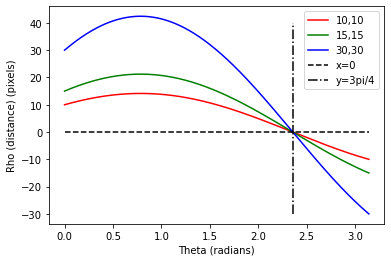

In [16]:
import numpy
from matplotlib import pyplot

xy = ((10, 10), (15, 15), (30, 30))
color = ("r", "g", "b")

theta = numpy.linspace(0, numpy.pi, 1000)
for (x, y), color in zip(xy, color):
    pyplot.plot(theta,
                x * numpy.cos(theta) + y * numpy.sin(theta),
                color,
                label=f"{x},{y}")
pyplot.plot([0, numpy.pi], [0, 0], "k--", label="x=0")
pyplot.plot([3*numpy.pi/4]*2, [-30, 40], "k-.", label="y=3pi/4")
pyplot.xlabel("Theta (radians)")
pyplot.ylabel("Rho (distance) (pixels)")
pyplot.legend()

pyplot.show()

As this image shows, the three given points have a single intersection in the parameter space along $\theta = [0, \pi]$. The intersection is at $\rho = 0$ and $\theta = 3 \pi / 4$, which defines the line. In $mx + c$ representation, we have $m = 1$ and $c = 0$, it's a line with a slope of 1 that passes through the origin.

**Q5**: How does the dimension of parameter space affects Hough Transform method? What would you do when the parameter space is high, i.e., 3D or 4D instead of 2D? Briefly explain your method.

The Hough Transform could theoretically work in higher dimensions. You could make a make a 3D accumulator matrix based on your chosen parameters (perhaps $(\theta, \phi, \rho)$ for 3D lines) and then for each point of interest you could go through the standard process of sweeping through the parameters and updating the accumulator accordingly. In this case you would sweep across both $\theta$ and $\phi$, calculate $\rho$, and update that accumulator element. Then after all points are processed the maximum values in the accumulator could be chosen and evaluated.

However, the Hough Transform in 3D seems pretty expensive both in terms of computation (we would have to sweep across $N-1$ axes for each point) and in terms of memory. If you had a 4D accumulator with 300 bins along each axis that would lead to a matrix with $300^4 = 8.1$ billion cells. The computation and storage costs really seem like they would blow up as you add dimensions.